<a href="https://colab.research.google.com/github/IrfanPavel/Medical-Insurance-Neural-Network-Regression/blob/main/Medical_Insurance_Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
insurance=pd.read_csv("/content/Medical_Cost.csv")

In [21]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [23]:
#Turn all Categories into Numbers
insurance_one_hot=pd.get_dummies(insurance)

In [24]:
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


# Split data into Features(X) and labels(y) 

In [25]:
X=insurance_one_hot.drop("charges",axis=1)
y=insurance_one_hot["charges"]

In [26]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [27]:
#Creating training and Test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=42)

# **Build The Model and Fit **

In [28]:
#Set random seed

tf.random.set_seed(42)

#Create a model

insurance_model=tf.keras.Sequential([
                                     tf.keras.layers.Dense(1),
                                     tf.keras.layers.Dense(1)
])


#Compile the model

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

#Fit The model
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8868.5918 - mae: 8868.5918
Epoch 2/100
34/34 [==============================] - 0s 934us/step - loss: 7887.1606 - mae: 7887.1606
Epoch 3/100
34/34 [==============================] - 0s 937us/step - loss: 7537.0947 - mae: 7537.0947
Epoch 4/100
34/34 [==============================] - 0s 890us/step - loss: 7859.4346 - mae: 7859.4346
Epoch 5/100
34/34 [==============================] - 0s 848us/step - loss: 7639.6699 - mae: 7639.6699
Epoch 6/100
34/34 [==============================] - 0s 852us/step - loss: 7578.0850 - mae: 7578.0850
Epoch 7/100
34/34 [==============================] - 0s 904us/step - loss: 7514.6177 - mae: 7514.6177
Epoch 8/100
34/34 [==============================] - 0s 925us/step - loss: 7694.1338 - mae: 7694.1338
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7595.9136 - mae: 7595.9136
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7735.9116 - 

In [29]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 8628.2393 - mae: 8628.2393


[8628.2392578125, 8628.2392578125]

# **We'll Try 3 things:**
.Increasing The number of layers(2->3)

.Increasing The number of units in each layer(except output layer)

.Changing The Optimizer(from SGD to Adam) 

In [30]:
#Set random seed

tf.random.set_seed(42)

#Create a model

insurance_model_2=tf.keras.Sequential([
                                     tf.keras.layers.Dense(100),
                                     tf.keras.layers.Dense(10),
                                     tf.keras.layers.Dense(1) #1 unit(important for output layer)
])


#Compile the model

insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

#Fit The model
history=insurance_model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9457.7227 - mae: 9457.7227
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7409.0811 - mae:

In [31]:
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4924.5093 - mae: 4924.5093


[4924.50927734375, 4924.50927734375]

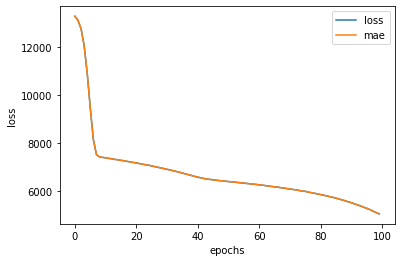

In [32]:
#Plot The Loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [33]:
# Training for a little longer

history_2=insurance_model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 4989.6201 - mae: 4989.6201
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 4915.0635 - mae: 4915.0635
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 4841.5186 - mae: 4841.5186
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 4761.9351 - mae: 4761.9351
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 4682.8105 - mae: 4682.8105
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 4606.6265 - mae: 4606.6265
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 4510.3018 - mae: 4510.3018
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 4421.1685 - mae: 4421.1685
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 4349.3486 - mae: 4349.3486
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 4256.1733 - mae: 4256.1733

In [34]:
# Evaluate the model and trained it for 200 total epochs
insurance_model_2_loss,insurance_model_2_mae=insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3495.8054 - mae: 3495.8054


Text(0.5, 0, 'epochs')

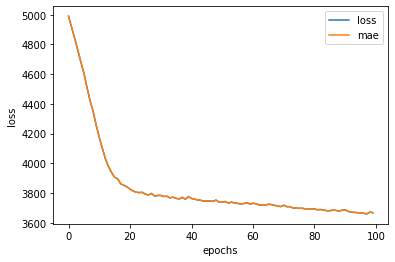

In [35]:
#Plot the model trained for 200 total epochs loss curves

pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


# **Preprocessing Data(Normalization and Standardization)**


# **Normalization: Scaling all values from their original range between 0 and 100,000 to be between 0 and 1**

# **Standardization: Converts all our data to unit variance and 0 mean**

# **Normalization**

In [36]:
insurance=pd.read_csv("/content/Medical_Cost.csv")

In [37]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

#Create a column Transformer

ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), #get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

#Create X and Y

X=insurance.drop("charges",axis=1)
y=insurance["charges"]



X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

ct.fit(X_train)

#Transform training and test data with Normalization(MinMaxScaler) and one hot Encodeing(One Hot Encoder)

X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)



In [39]:
X_train

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [40]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

# `Insurance_3



In [41]:
tf.random.set_seed(42)

#Build The Model(3 layers,100,10,1 units)

insurance_model_3=tf.keras.Sequential([
                                       tf.keras.layers.Dense(100),
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])

#Compile The model

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

insurance_model_3.fit(X_train_normal,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 11925.96

Evaluate 3rd Model

In [42]:
insurance_model_3_loss,insurance_model_3_mae=insurance_model_3.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3171.5774 - mae: 3171.5774


In [43]:
insurance_model_2_mae,insurance_model_3_mae

(3495.805419921875, 3171.577392578125)